In [ ]:
# This is a strategy taken from Youtube which boasts a 62% return and has 3 rules. Let's see if I can do this strategy some justice

# The three rules are:
# 1)Buy when stock hits a 5 day low (let's play around witht his number)
# 2)Only buy when stock is above 200 day SMA
# 3)Sell stock after a 5 day high

#Stop loss is set at a 2 times 20 day ATR

#https://www.youtube.com/watch?v=_9Bmxylp63Y&t=86s&ab_channel=CriticalTrading



In [32]:
def printTradeAnalysis(analyzer):
    '''
    Function to print the Technical Analysis results in a nice format.
    '''
    #Get the results we are interested in
    total_open = analyzer.total.open
    total_closed = analyzer.total.closed
    total_won = analyzer.won.total
    total_lost = analyzer.lost.total
    win_streak = analyzer.streak.won.longest
    lose_streak = analyzer.streak.lost.longest
    pnl_net = round(analyzer.pnl.net.total,2)
    strike_rate = (total_won / total_closed) * 100
    #Designate the rows
    h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
    h2 = ['Strike Rate','Win Streak', 'Losing Streak', 'PnL Net']
    r1 = [total_open, total_closed,total_won,total_lost]
    r2 = [strike_rate, win_streak, lose_streak, pnl_net]
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("Trade Analysis Results:")
    for row in print_list:
        print(row_format.format('',*row))

        
def printSQN(analyzer):
    sqn = round(analyzer.sqn,2)
    print('SQN: {}'.format(sqn))


In [38]:
import backtrader as bt
from datetime import datetime

class firstStrategy(bt.Strategy):
    params = (('maperiod', 200),('atrperiod', 21), ('atrdist', 3.0))
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        self.dataclose = self.datas[0].close  
        self.sma = bt.indicators.ExponentialMovingAverage(
        self.datas[0], period=self.params.maperiod)
        self.atr = bt.indicators.ATR(self.data, period=self.params.atrperiod)
        
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]: 
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f' %(order.executed.price))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f' %(order.executed.price))
            self.bar_executed = len(self)
                         
    def next(self): 
        self.log('Close, %.2f' % self.dataclose[0])
        if not self.position:
            if self.dataclose[0] > self.sma[0]:
                if self.dataclose[0] < self.dataclose[-1]:
                    if self.dataclose[0] < self.dataclose[-2]:
                        if self.dataclose[0] < self.dataclose[-3]:
                            if self.dataclose[0] < self.dataclose[-4]:
                                if self.dataclose[0] < self.dataclose[-5]:
                                    self.log('BUY CREATE, %.2f' % self.dataclose[0])
                                    self.buy()
                                    pdist = self.atr[0] * self.params.atrdist
                                    self.pstop = self.data.close[0] - pdist
        elif self.position:
            pstop = self.pstop
            pdist = self.atr[0] * self.p.atrdist
            self.pstop = max(pstop, self.data.close[0] - pdist)
            if self.dataclose[0] > self.dataclose[-1]:
                if self.dataclose[0] > self.dataclose[-2]:
                    if self.dataclose[0] > self.dataclose[-3]:
                        if self.dataclose[0] > self.dataclose[-4]:
                            if self.dataclose[0] < self.dataclose[-5]:
                                self.log('SELL CREATE INDICATOR INITIATED, %.2f' % self.dataclose[0])
                                self.sell()
            elif self.data.close[0] < pstop:
                self.close()
                self.log('SELL hit stoploss, %.2f, pstop is set at %s' % (self.dataclose[0], pstop))
                    

2015-01-14, Close, 178.10
2015-01-14, BUY CREATE, 178.10
2015-01-15, BUY EXECUTED, Price: 178.78
2015-01-15, Close, 176.47
2015-01-16, Close, 178.78
2015-01-20, Close, 179.16
2015-01-21, Close, 180.07
2015-01-22, Close, 182.74
2015-01-23, Close, 181.74
2015-01-26, Close, 182.17
2015-01-27, Close, 179.76
2015-01-28, Close, 177.46
2015-01-29, Close, 179.10
2015-01-30, Close, 176.85
2015-02-02, Close, 179.04
2015-02-03, Close, 181.63
2015-02-04, Close, 180.94
2015-02-05, Close, 182.76
2015-02-06, Close, 182.26
2015-02-09, Close, 181.44
2015-02-10, Close, 183.37
2015-02-11, Close, 183.48
2015-02-12, Close, 185.24
2015-02-13, Close, 186.01
2015-02-17, Close, 186.30
2015-02-18, Close, 186.32
2015-02-19, Close, 186.18
2015-02-20, Close, 187.30
2015-02-23, Close, 187.28
2015-02-24, Close, 187.81
2015-02-25, Close, 187.65
2015-02-26, Close, 187.43
2015-02-27, Close, 186.79
2015-03-02, Close, 187.97
2015-03-03, Close, 187.20
2015-03-04, Close, 186.41
2015-03-05, Close, 186.61
2015-03-06, Close, 

2019-03-19, Close, 272.38
2019-03-20, Close, 271.56
2019-03-21, Close, 274.62
2019-03-22, Close, 269.34
2019-03-25, Close, 269.14
2019-03-26, Close, 271.14
2019-03-27, Close, 269.72
2019-03-28, Close, 270.75
2019-03-29, Close, 272.45
2019-04-01, Close, 275.69
2019-04-02, Close, 275.82
2019-04-03, Close, 276.25
2019-04-04, Close, 276.99
2019-04-05, Close, 278.33
2019-04-08, Close, 278.54
2019-04-09, Close, 277.11
2019-04-10, Close, 278.06
2019-04-11, Close, 277.98
2019-04-12, Close, 279.86
2019-04-15, Close, 279.68
2019-04-16, Close, 279.86
2019-04-17, Close, 279.18
2019-04-18, Close, 279.73
2019-04-22, Close, 279.97
2019-04-23, Close, 282.49
2019-04-24, Close, 281.86
2019-04-25, Close, 281.68
2019-04-26, Close, 283.00
2019-04-29, Close, 283.44
2019-04-30, Close, 283.58
2019-05-01, Close, 281.45
2019-05-02, Close, 280.85
2019-05-03, Close, 283.59
2019-05-06, Close, 282.43
2019-05-07, Close, 277.71
2019-05-08, Close, 277.33
2019-05-09, Close, 276.49
2019-05-09, SELL hit stoploss, 276.49,

<IPython.core.display.Javascript object>


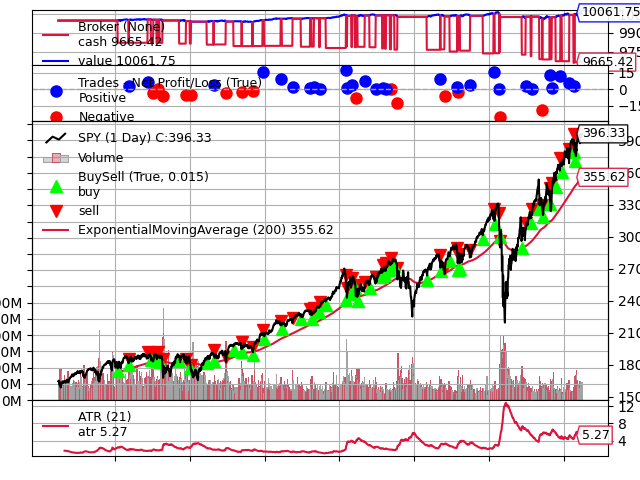

[[<Figure size 640x480 with 5 Axes>]]

In [39]:
#Create an instance of cerebro
cerebro = bt.Cerebro()

#Add our strategy
cerebro.addstrategy(firstStrategy)

#Get Apple data from Yahoo Finance.
data = bt.feeds.YahooFinanceData(
    dataname='SPY',
    fromdate = datetime(2014,4,1),
    todate = datetime(2021,4,1),
    buffered= True
    )

#Add the data to Cerebro
cerebro.adddata(data)

# Set our desired cash start
startcash = 10000
cerebro.broker.setcash(startcash)

cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")


# Run over everything
strategies=cerebro.run()

#Get final portfolio Value
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash

#Print out the final result
#print('Final Portfolio Value: ${}'.format(portvalue))
#print('P/L: ${}'.format(pnl))

#Finally plot the end results
cerebro.plot(style='line')

In [35]:
# Next steps
# add analyzers
# understand analyzers results
# Win%? How to optimize this strategy
firstStrat = strategies[0]

In [40]:
printTradeAnalysis(firstStrat.analyzers.ta.get_analysis())
printSQN(firstStrat.analyzers.sqn.get_analysis())

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               1              61             33             28             
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               54.098360655737715              5              65.77          
SQN: 1.1


<IPython.core.display.Javascript object>


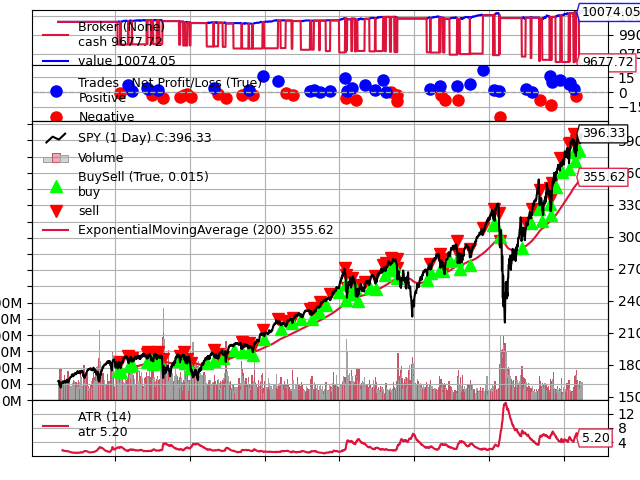

[[<Figure size 640x480 with 5 Axes>]]

In [31]:
cerebro.plot()

In [27]:
firstStrat = strategies[0]